In [1]:
import os
import sys

sys.path.insert(0, os.path.join(os.path.abspath(), "..", ".."))

import numpy as np
import matplotlib.pyplot as plt

from infovar.stats import entropy_estimators as ee

In [2]:
# Theoretical Shannon entropy of normal distribution
def h_normal(sigma, base: float=2) :
    return 1/2 * np.log(2*np.pi*np.e*sigma**2) / np.log(base)

# Theoretical Shannon entropy of uniform distribution
def h_uniform(length, base: float=2) :
    return np.log(length) / np.log(base)

# Theoretical Shannon entropy of Laplace distribution
def h_laplace(lamda, base: float=2) :
    return (1 + np.log(2*lamda)) / np.log(base)

# Lower bound of MSE
def mse_lower_bound(cond_h, base: float=2) :
    return 1/(2*np.pi*np.e) * np.exp(2*cond_h*np.log(base))

## Settings

In [3]:
stds = 10.**np.linspace(-7, 3, 25)

N = 100_000

x = np.random.uniform(0, 1, size = (N, 1))

## Gaussian additive noise

In [4]:
# Entropy computing

noise = np.random.normal(0, 1, size = (N, 1))

hs = np.zeros_like(stds)
hs_th = np.zeros_like(stds)
for i in range(stds.size) :
    
    y = x + stds[i] * noise
    h = ee.centropy(y, x)
    
    hs[i] = h
    hs_th[i] = h_normal(stds[i])

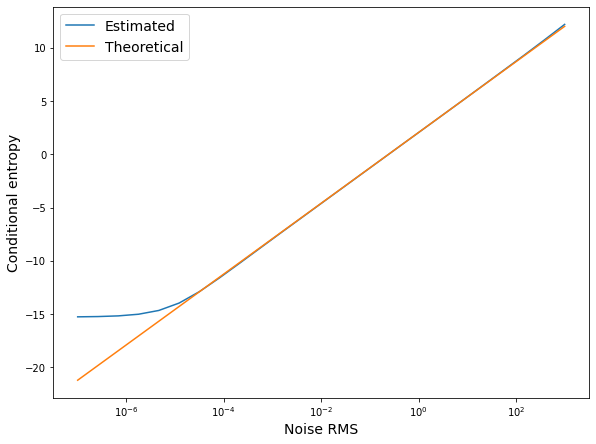

In [5]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.semilogx(stds, hs, label = 'Estimated')
plt.semilogx(stds, hs_th, label = 'Theoretical')

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('Conditional entropy', fontsize = 14)
plt.legend(fontsize = 14);

In [6]:
lbs = mse_lower_bound(hs)
lbs_th = mse_lower_bound(hs_th)
mse = stds**2

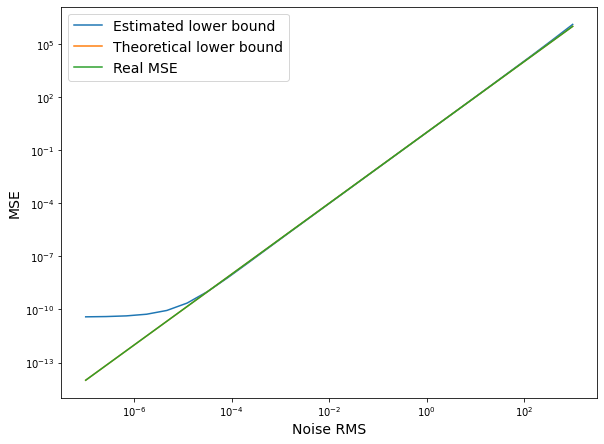

In [7]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.loglog(stds, lbs, label = 'Estimated lower bound')
plt.loglog(stds, lbs_th, label = 'Theoretical lower bound')
plt.loglog(stds, mse, label = 'Real MSE')

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('MSE', fontsize = 14)
plt.legend(fontsize = 14);

In [8]:
factors = mse / lbs_th

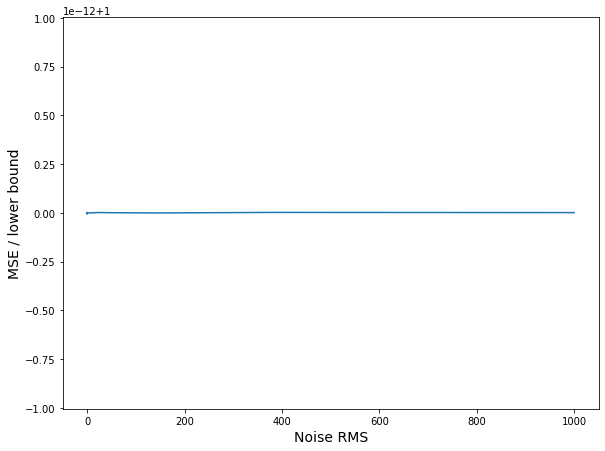

In [9]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.plot(stds, factors)

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('MSE / lower bound', fontsize = 14);

## Uniform additive noise

In [10]:
# Entropy computing

noise = np.random.uniform(-0.5, 0.5, size = (N, 1)) * sqrt(12)

hs = np.zeros_like(stds)
hs_th = np.zeros_like(stds)
for i in range(stds.size) :
    
    y = x + stds[i] * noise
    h = ee.centropy(y, x)
    
    hs[i] = h
    hs_th[i] = h_uniform(sqrt(12) * stds[i])

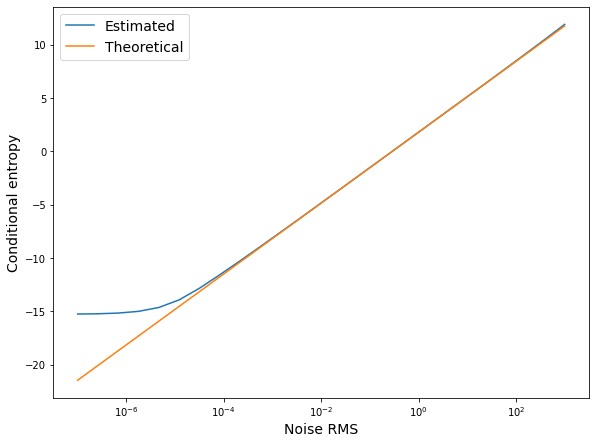

In [11]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.semilogx(stds, hs, label = 'Estimated')
plt.semilogx(stds, hs_th, label = 'Theoretical')

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('Conditional entropy', fontsize = 14)
plt.legend(fontsize = 14);

In [12]:
lbs = mse_lower_bound(hs)
lbs_th = mse_lower_bound(hs_th)
mse = stds**2

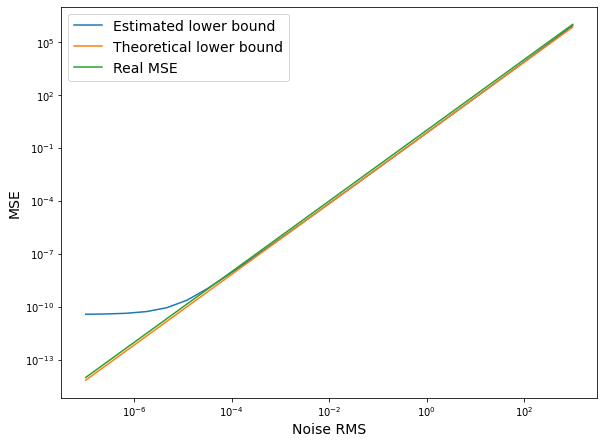

In [13]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.loglog(stds, lbs, label = 'Estimated lower bound')
plt.loglog(stds, lbs_th, label = 'Theoretical lower bound')
plt.loglog(stds, mse, label = 'Real MSE')

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('MSE', fontsize = 14)
plt.legend(fontsize = 14);

In [14]:
factors = mse / lbs_th

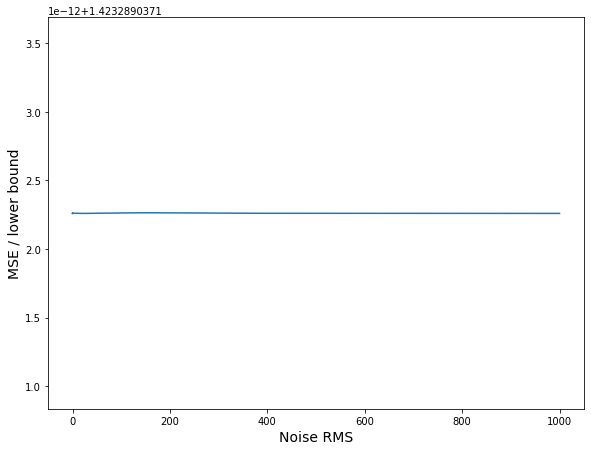

In [15]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.plot(stds, factors)

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('MSE / lower bound', fontsize = 14);

## Laplace additive noise

In [16]:
# Entropy computing

noise = np.random.laplace(0, 1/sqrt(2), size = (N, 1))

hs = np.zeros_like(stds)
hs_th = np.zeros_like(stds)
for i in range(stds.size) :
    
    y = x + stds[i] * noise
    h = ee.centropy(y, x)
    
    hs[i] = h
    hs_th[i] = h_laplace(stds[i]/sqrt(2))

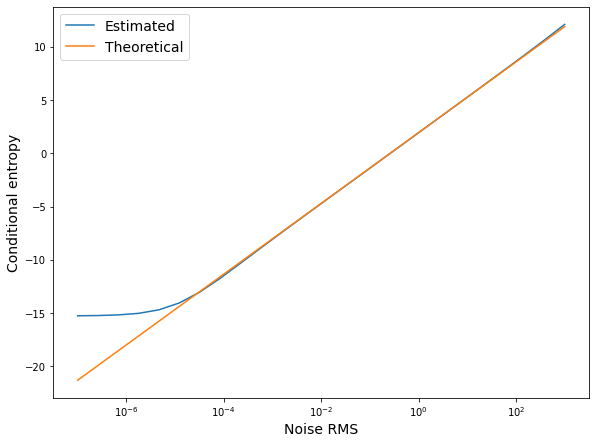

In [17]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.semilogx(stds, hs, label = 'Estimated')
plt.semilogx(stds, hs_th, label = 'Theoretical')

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('Conditional entropy', fontsize = 14)
plt.legend(fontsize = 14);

In [18]:
lbs = mse_lower_bound(hs)
lbs_th = mse_lower_bound(hs_th)
mse = stds**2

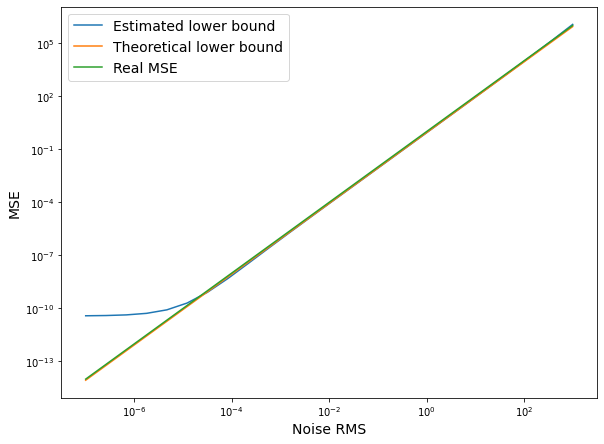

In [19]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.loglog(stds, lbs, label = 'Estimated lower bound')
plt.loglog(stds, lbs_th, label = 'Theoretical lower bound')
plt.loglog(stds, mse, label = 'Real MSE')

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('MSE', fontsize = 14)
plt.legend(fontsize = 14);

In [20]:
factors = mse / lbs_th

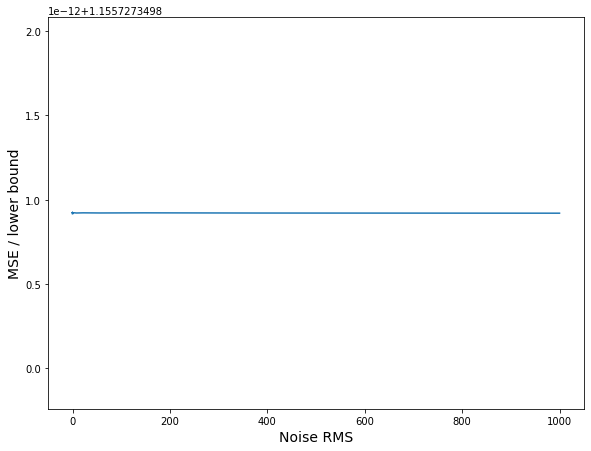

In [21]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))

plt.plot(stds, factors)

plt.xlabel('Noise RMS', fontsize = 14)
plt.ylabel('MSE / lower bound', fontsize = 14);